# OpenCV를 이용한 RGB채널의 분할 및 병합
* 이미지는 3개의 채널로 구성(Red Green Blue)
* OpenCV를 이용해 RGB채널을 분할 혹은 병합하는 방법

### 이미지 다운로드

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-split-merge/opencv-split-merge.zip
!unzip -qq opencv-split-merge.zip
%cd opencv-split-merge

--2021-04-22 06:47:09--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-split-merge/opencv-split-merge.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.204.249
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.204.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117380 (115K) [application/zip]
Saving to: ‘opencv-split-merge.zip’

opencv-split-merge. 100%[===================>] 114.63K  --.-KB/s    in 0.1s    

2021-04-22 06:47:09 (1.01 MB/s) - ‘opencv-split-merge.zip’ saved [117380/117380]

/content/opencv-split-merge


## 코드

### 패키지 임포트

In [4]:
import matplotlib.pyplot as plt
import argparse
import numpy as np
import cv2
import os

### 코랩 및 쥬피터 노트북에서 이미지 표출

In [10]:
def plt_imshow(title, image):
  """
  이미지 프레임을 BGR에서 RGB로 변환하고 해당 이미지를 화면에 보여줌
  """
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.title(title)
  plt.imshow(image)
  plt.grid(False)
  plt.show()

### OpenCV를 이용한 체널 분리 및 병합 
* 이미지 로드 
* RGB채널로 분리 - cv2.split
* 해당 채널의 이미지 표출
* BGR채널로 머지 - cv2.merge

In [13]:
# 파이썬 스크립트를 터미널에서 수행(argument parsing)
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, default="opencv_logo.png",
# 	help="path to the input image")
# args = vars(ap.parse_args())

# 코랩에서 수행
# 이미지만 가져옴
args = {
    "image": 'adrian.png'
}
imgList = [file for file in os.listdir('/content/opencv-split-merge') if file.endswith('.png')]

In [ ]:
help(cv2.split)

Help on built-in function split:

split(...)
    split(m[, mv]) -> mv
    .   @overload
    .   @param m input multi-channel array.
    .   @param mv output vector of arrays; the arrays themselves are reallocated, if needed.



### 방법1

In [25]:
def rgb_split(imgList):
  '''
  리스트에서 이미지를 가져와서 RGB로 채널을 분리해서 각각의 채널로 
  나누어서 이미지를 보여줌.
  '''
  for img in imgList:
    image = cv2.imread(img)
    plt_imshow("Original Image", image)
    (B, G, R) = cv2.split(image)

    # 일반적으로 RGB 색상 공간의 이미지를 생각하면,빨간색 픽셀이 먼저, 녹색 픽셀이 두 번째, 파란색 픽셀이 세 번째입니다. 
    # OpenCV는 RGB 이미지를 역 채널 순서로 NumPy 배열로 저장하므로, 
    # 이미지를 RGB 순서로 저장하는 대신 BGR 순서로 저장합니다. 따라서 우리는 역순으로 튜플을 압축 해제합니다.
    plt_imshow("Red", R)
    plt_imshow("Green", G)
    plt_imshow("Blue", B)

    # 1.분리된 채널을 BGR채널로 머지후 시각화
    merged = cv2.merge([B, G, R])
    plt_imshow("Merged Image", merged)

    #2.RGB채널로 시각화
    zeros = np.zeros(image.shape[:2], dtype="uint8")
    plt_imshow("Red Merged", cv2.merge([zeros, zeros, R]))
    plt_imshow("Green Merged", cv2.merge([zeros, G, zeros]))
    plt_imshow("Blue Merged", cv2.merge([B, zeros, zeros]))

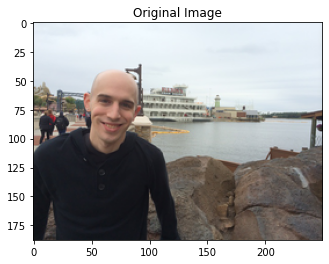

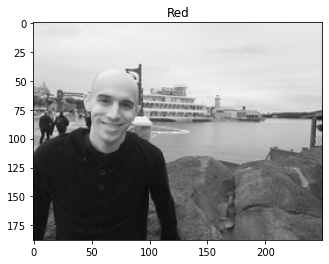

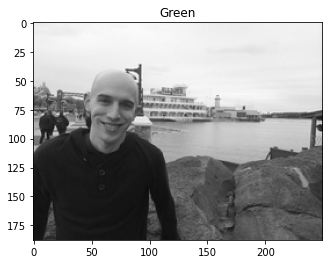

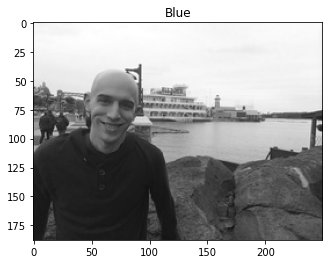

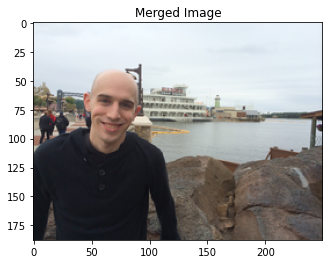

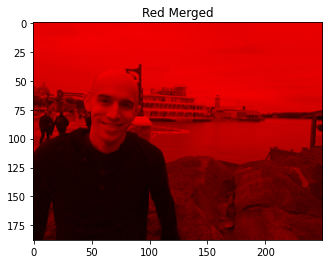

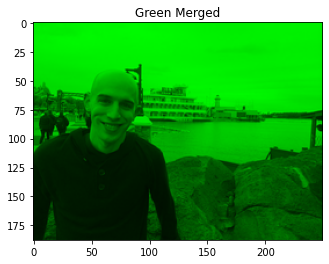

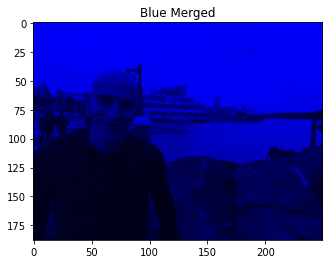

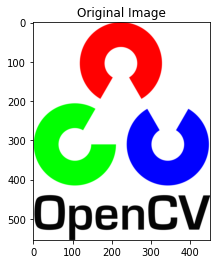

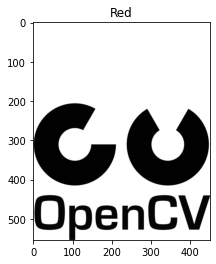

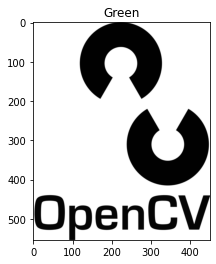

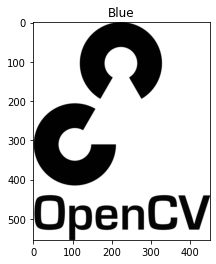

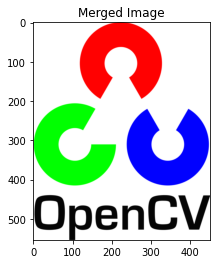

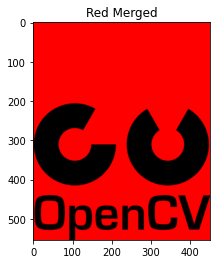

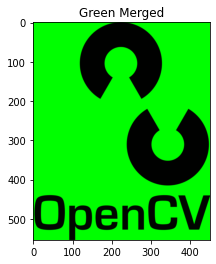

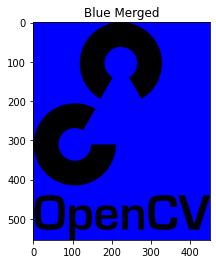

In [26]:
# 이미지를 각각의 채널로 분리해서 채널별 이미지보여줌
rgb_split(imgList)

### 방법2

array([[231, 231, 231, ..., 232, 231, 231],
       [231, 232, 231, ..., 231, 231, 230],
       [233, 232, 232, ..., 231, 231, 231],
       ...,
       [ 21,  19,  19, ...,  76,  83,  85],
       [ 23,  22,  21, ...,  83,  76,  80],
       [ 22,  20,  18, ...,  80,  84,  85]], dtype=uint8)

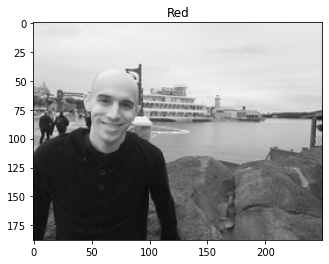

array([[238, 238, 238, ..., 241, 240, 240],
       [238, 239, 238, ..., 240, 240, 239],
       [240, 239, 239, ..., 240, 240, 240],
       ...,
       [ 22,  22,  23, ...,  71,  78,  76],
       [ 24,  24,  24, ...,  77,  67,  70],
       [ 23,  21,  21, ...,  74,  76,  77]], dtype=uint8)

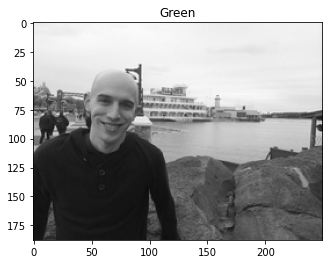

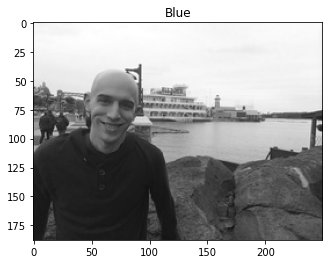

In [22]:
# 이미지 로드 후 cv2.split을 이용해 RGB채널을 튜플로 리턴받음
image = cv2.imread(args['image'])

# 일반적으로 RGB 색상 공간의 이미지를 생각하면,빨간색 픽셀이 먼저, 녹색 픽셀이 두 번째, 파란색 픽셀이 세 번째입니다. 
# OpenCV는 RGB 이미지를 역 채널 순서로 NumPy 배열로 저장하므로, 
# 이미지를 RGB 순서로 저장하는 대신 BGR 순서로 저장합니다. 따라서 우리는 역순으로 튜플을 압축 해제합니다.
(B, G, R) = cv2.split(image) 

# show each channel individually
display(R)
plt_imshow("Red", R)
display(G)
plt_imshow("Green", G)
plt_imshow("Blue", B)

In [ ]:
help(cv2.merge)

Help on built-in function merge:

merge(...)
    merge(mv[, dst]) -> dst
    .   @overload
    .   @param mv input vector of matrices to be merged; all the matrices in mv must have the same
    .   size and the same depth.
    .   @param dst output array of the same size and the same depth as mv[0]; The number of channels will
    .   be the total number of channels in the matrix array.



#### RGB채널 시각화
* 첫번째 방법

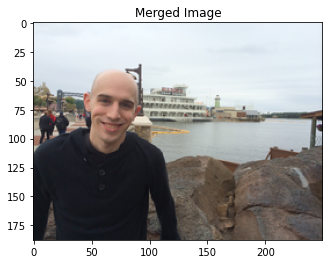

In [21]:
# 분리된 채널 병합
# BGR 순서로 채널을 지정
# display(B, G, R, B.shape)
merged = cv2.merge([B, G, R])
plt_imshow("Merged Image", merged)

* 두번째 방법

(188, 250)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

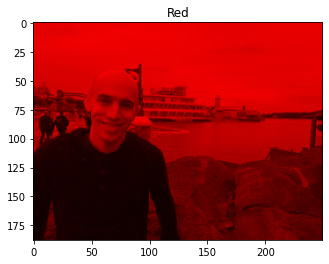

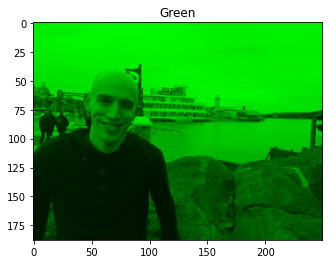

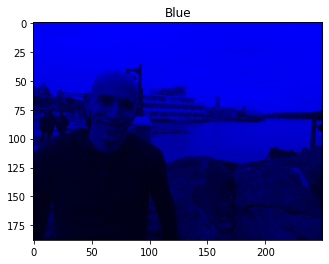

In [27]:
# 각각의 채널을 RGB로 시각화
zeros = np.zeros(image.shape[:2], dtype='uint8')
display(image.shape[:2])  # (554, 450)
display(zeros)

plt_imshow("Red", cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))

### 정리
* OpenCV를 사용하여 채널을 분리하고 병합하는 방법
  - `cv2.split()` 
  - `cv2.merge()`